In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

Questions: 
Column of X~ : the column of 1 is here for the bias term, and the second column is the height of every person
Rows of X~ : each row correspond to a person's height
1's in X~ : the 1's column is here so that we can multiply the w = [w0, w1] matrix with X~
3 people:  y = 3x1 and X~ = 3x2 , with X32 being the height of the third person


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    N = len(y)
    Xw = tx @ w
    MSE = (1 / (2 * N) ) * np.sum((y[:] - Xw[:])**2)
    return MSE
    # ***************************************************
    #raise NotImplementedError

In [5]:
w = np.array([1, 2])
MSE = compute_loss(y, tx, w)
print(MSE)

2694.4833658870843


# 2. Grid Search

Fill in the function `grid_search()` below:

In [6]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    for i in range(len(grid_w0)): 
        for j in range(len(grid_w1)): 
            w = np.array([grid_w0[i], grid_w1[j]])
            losses[i][j] = compute_loss(y, tx, w)
    # ***************************************************
    #raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.127 seconds


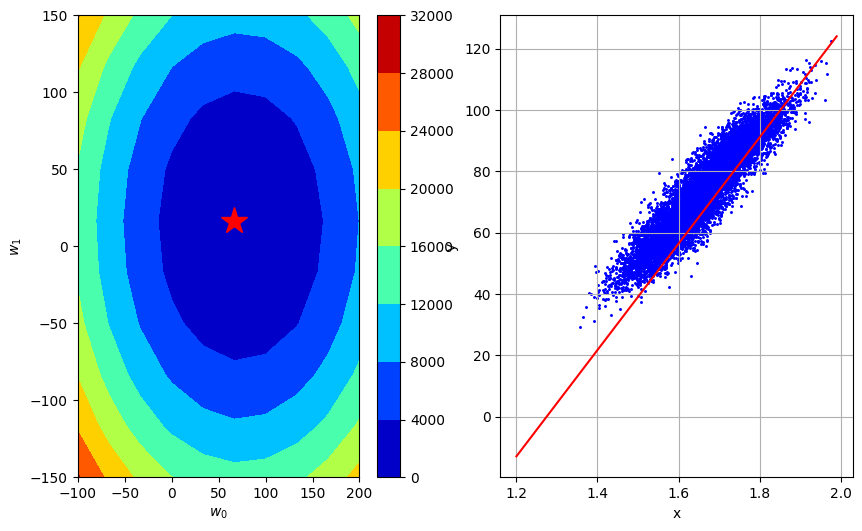

In [7]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    e = y - tx @ w
    gradient = - (1 / len(y) ) * (tx.T @ e)
    return gradient
    # ***************************************************
    #raise NotImplementedError

In [9]:
w = np.array([72, 13])
compute_gradient(y, tx, w)

array([-1.293922  , -0.47971243])

Please fill in the functions `gradient_descent` below:

In [10]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        gradient= compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * gradient
        # ***************************************************
        #raise NotImplementedError

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [11]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([10, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=5761.326249239219, w0=16.329392200210528, w1=91.3479712434989
GD iter. 1/49: loss=4669.597580578844, w0=22.025845180400026, w1=83.56114536264788
GD iter. 2/49: loss=3785.297358963937, w0=27.152652862570555, w1=76.55300206988198
GD iter. 3/49: loss=3069.0141794558654, w0=31.766779776524018, w1=70.24567310639272
GD iter. 4/49: loss=2488.82480405433, w0=35.919493999082135, w1=64.56907703925236
GD iter. 5/49: loss=2018.8714099790857, w0=39.65693679938447, w1=59.46014057882602
GD iter. 6/49: loss=1638.2091607781356, w0=43.02063531965655, w1=54.862097764442325
GD iter. 7/49: loss=1329.872738925367, w0=46.047963987901426, w1=50.723859231496995
GD iter. 8/49: loss=1080.1202372246244, w0=48.772559789321804, w1=46.9994445518462
GD iter. 9/49: loss=877.8207108470235, w0=51.22469601060015, w1=43.647471340160486
GD iter. 10/49: loss=713.9580944811664, w0=53.43161860975066, w1=40.63069544964335
GD iter. 11/49: loss=581.2293752248224, w0=55.41784894898611, w1=37.91559714817791
GD 

In [12]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [13]:
from helpers import *

def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    e = y - tx @ w
    gradient = - (1 / len(y) ) * (tx.T @ e)
    return gradient
    # ***************************************************
    #raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        yB, txB = next(batch_iter(y, tx, batch_size, num_batches=1, shuffle=True))
        gradient= compute_gradient(yB, txB, w)
        loss = compute_loss(yB, txB, w)
        w = w - gamma * gradient
        # ***************************************************
        #raise NotImplementedError
        ws.append(w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [14]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=3132.989783341298, w0=7.915794064200127, w1=1.6608068861950878
SGD iter. 1/49: loss=3125.507857760281, w0=15.82213058342353, w1=9.957243372275
SGD iter. 2/49: loss=1140.4249171297422, w0=20.597954946043544, w1=7.7210415566202215
SGD iter. 3/49: loss=1572.700101883225, w0=26.206341704966693, w1=6.118747966400355
SGD iter. 4/49: loss=622.1022968817919, w0=29.733670146951624, w1=-2.63262719476979
SGD iter. 5/49: loss=1671.7723923338158, w0=35.516009452689076, w1=-0.512465760355743
SGD iter. 6/49: loss=1911.6355726900945, w0=41.699270037024974, w1=8.304641355718848
SGD iter. 7/49: loss=679.3252679675634, w0=45.38525774174555, w1=6.8067881412599
SGD iter. 8/49: loss=351.07556166401906, w0=48.03507117541977, w1=7.009844380673164
SGD iter. 9/49: loss=438.95592364001635, w0=50.998028899181676, w1=6.221341149091812
SGD iter. 10/49: loss=85.07130281682426, w0=52.30241613322549, w1=3.7833465658907195
SGD iter. 11/49: loss=248.84238152169263, w0=54.53330107656835, w1=5.6719184

In [15]:
print(sgd_ws)

[array([0, 0]), array([7.91579406, 1.66080689]), array([15.82213058,  9.95724337]), array([20.59795495,  7.72104156]), array([26.2063417 ,  6.11874797]), array([29.73367015, -2.63262719]), array([35.51600945, -0.51246576]), array([41.69927004,  8.30464136]), array([45.38525774,  6.80678814]), array([48.03507118,  7.00984438]), array([50.9980289 ,  6.22134115]), array([52.30241613,  3.78334657]), array([54.53330108,  5.67191841]), array([56.34543797,  6.81982137]), array([57.99657322,  6.8930373 ]), array([59.75539946,  6.61501393]), array([59.82721801,  6.58164926]), array([61.74364009,  7.94961147]), array([61.18250492,  8.49585342]), array([61.78416698,  7.42637841]), array([63.00504422,  8.57342044]), array([64.73691184,  9.06652566]), array([65.62721779,  9.61834595]), array([65.45858714,  9.6451532 ]), array([67.75534599, 10.86069131]), array([67.73225899, 10.85971958]), array([67.51599375, 11.15529038]), array([68.64117796, 10.85585601]), array([68.77407949, 10.83953944]), array(

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [17]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************
#raise NotImplementedError

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [18]:
y.shape, tx.shape

((202,), (202, 2))

In [19]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
batch_size = 1

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
# ***************************************************
#raise NotImplementedError


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2957.1379759153315, w0=53.83303090479882, w1=6.808149099407296
SGD iter. 1/49: loss=35.599143319419454, w0=59.739566306625434, w1=3.557157078535266
SGD iter. 2/49: loss=218.34631600940492, w0=74.36760068207099, w1=15.93493921942775
SGD iter. 3/49: loss=24.8409410433333, w0=69.43362437259538, w1=18.36793289572622
SGD iter. 4/49: loss=21.522976401870462, w0=74.02628339257858, w1=18.15516807425212
SGD iter. 5/49: loss=5.9807294956472905, w0=71.6053094344918, w1=17.157390410719586
SGD iter. 6/49: loss=12.854939972268177, w0=68.05596566798752, w1=16.253057567487787
SGD iter. 7/49: loss=5.665878737915088, w0=70.4123529797758, w1=16.39554008310515
SGD iter. 8/49: loss=32.91323403030872, w0=76.09169883556787, w1=16.698065138405973
SGD iter. 9/49: loss=15.229102627373686, w0=72.22847213049008, w1=18.666795922541667
SGD iter. 10/49: loss=2.0023912667374653, w0=73.62930882382828, w1=19.953423798634816
SGD iter. 11/49: loss=2.1532818033961307, w0=75.08196713441897, w1=18.59024

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [21]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE
    e = y - tx @ w
    gradient = - (1 / len(y) ) * (tx.T @ np.sign(e))
    return gradient
    # ***************************************************
    raise NotImplementedError

In [22]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        gradient= compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        #raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        w = w - gamma * gradient
        # ***************************************************
        #raise NotImplementedError

        # store w and loss
        ws.append(w)
        losses.append(loss)

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [32]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
SubGD iter. 1/499: loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557826
SubGD iter. 2/499: loss=36.45002800750045, w0=71.64420110331838, w1=14.084860844773324
SubGD iter. 3/499: loss=15.696028199160633, w0=73.03585105280729, w1=14.358451666937965
SubGD iter. 4/499: loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
SubGD iter. 5/499: loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
SubGD iter. 6/499: loss=13.644931152102243, w0=73.61616908174418, w1=14.472539039780616
SubGD iter. 7/499: loss=13.643569482174811, w0=73.62744144633503, w1=14.474755125440149
SubGD iter. 8/499: loss=13.643446931881352, w0=73.63082315571229, w1=14.47541995113801
SubGD iter. 9/499: loss=13.643435902354936, w0=73.63183766852546, w1=14.475619398847368
SubGD iter. 10/499: loss=13.643434909697561, w0=73.63214202236942, w1=14.475679233160175
SubGD iter. 11/499: loss=13.64343482

In [33]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=1001, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [34]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        yB, txB = next(batch_iter(y, tx, batch_size, num_batches=1, shuffle=True))
        gradient= compute_gradient(yB, txB, w)
        loss = compute_loss(yB, txB, w)
        w = w - gamma * gradient
        # ***************************************************
        #raise NotImplementedError
        ws.append(w)
        losses.append(loss)
        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [35]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/499: loss=1506.5271984306564, w0=38.42390732944846, w1=-35.83274815458299
SGD iter. 1/499: loss=1734.9235714558054, w0=-2.8098785751551674, w1=45.28285533367088
SGD iter. 2/499: loss=3340.53025731888, w0=54.406549591696546, w1=45.87820619071001
SGD iter. 3/499: loss=1314.157268511639, w0=90.29351272793038, w1=8.834803119068745
SGD iter. 4/499: loss=261.1725397643632, w0=74.29510377675415, w1=20.753531029091413
SGD iter. 5/499: loss=6.554395357403213, w0=71.76067929568252, w1=21.85630941506512
SGD iter. 6/499: loss=24.8401774945813, w0=76.69457977549459, w1=23.789558472105423
SGD iter. 7/499: loss=8.653054302670311, w0=79.6066225664949, w1=21.915735976773323
SGD iter. 8/499: loss=0.3338850598886057, w0=79.03460214842329, w1=22.700951782264777
SGD iter. 9/499: loss=11.75878570154319, w0=75.63995783899817, w1=23.94536181772502
SGD iter. 10/499: loss=0.4305590094807908, w0=74.99038272456477, w1=23.88588945614872
SGD iter. 11/499: loss=290.24387311299904, w0=91.85570204116055, w

In [36]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>